In [1]:
import os
import PyPDF2
import re
import matplotlib.pyplot as plt

def count_tokens_in_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        word_count = 0
        for page in reader.pages:
            text = page.extract_text()
            words = re.findall(r'\w+', text.lower())
            word_count += len(words)
    token_count = int(word_count * (100 / 75))  # Convert words to tokens
    return token_count

def process_directory(directory):
    token_counts = {}
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith('.pdf'):
                pdf_path = os.path.join(root, file)
                token_count = count_tokens_in_pdf(pdf_path)
                token_counts[file] = token_count
                print(f"File: {pdf_path}, Token count: {token_count}")
    return token_counts

directory_path = '../data'
token_counts = process_directory(directory_path)

# Calculate total tokens
total_tokens = sum(token_counts.values())

File: ../data/금융분야 마이데이터 표준 API 규격_6_업권별 정보제공 API 명세.pdf, Token count: 37866
File: ../data/금융분야 마이데이터 표준 API 규격_5_인증 API 명세.pdf, Token count: 1594
File: ../data/마이데이터 기술 가이드라인_5_마이데이터 보안.pdf, Token count: 5360
File: ../data/금융분야 마이데이터 표준 API 규격_2_표준 API 기본규격.pdf, Token count: 4085
File: ../data/금융분야 마이데이터 표준 API 규격_7_지원 API 명세.pdf, Token count: 4802
File: ../data/금융분야 마이데이터 표준 API 규격_1_개요.pdf, Token count: 681
File: ../data/마이데이터 기술 가이드라인_4_마이데이터 본인인증.pdf, Token count: 2254
File: ../data/마이데이터 기술 가이드라인_7_참고.pdf, Token count: 1513
File: ../data/마이데이터 기술 가이드라인_2_개인신용정보 전송 개요.pdf, Token count: 3584
File: ../data/금융분야 마이데이터 표준 API 규격_4_표준 API 목록.pdf, Token count: 1190
File: ../data/금융분야 마이데이터 표준 API 규격_첨부.pdf, Token count: 

/var/folders/74/y2rcq6qd0qxb67khxrrjn5hc0000gn/T/ipykernel_24579/4235186571.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_labels)


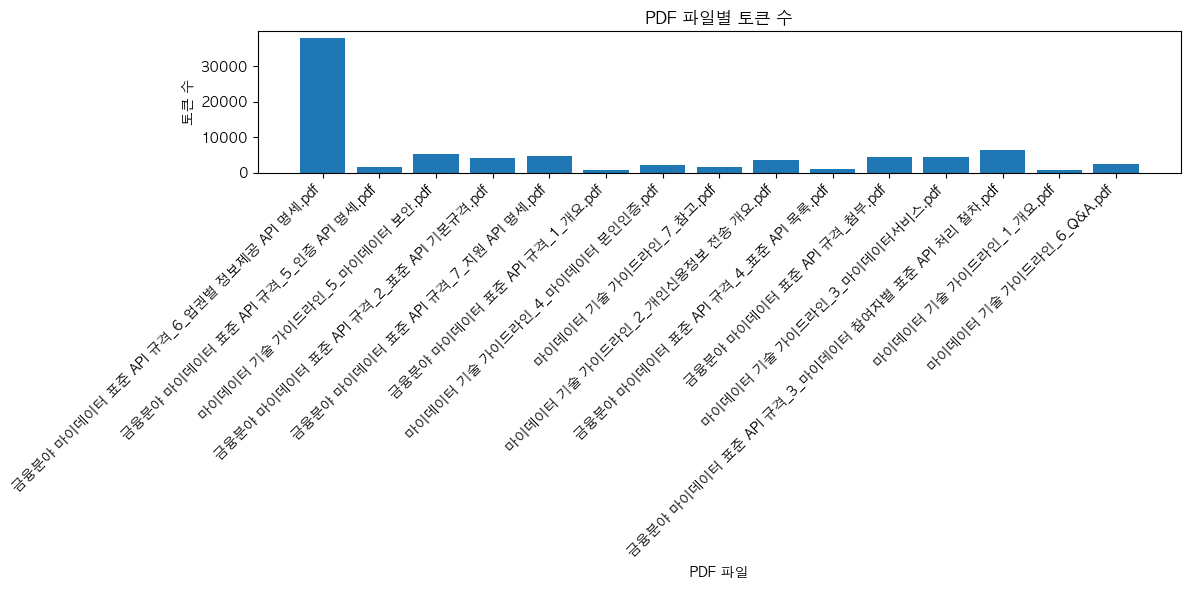

금융분야 마이데이터 표준 API 규격_6_업권별 정보제공 API 명세.pdf: 37866 토큰
금융분야 마이데이터 표준 API 규격_5_인증 API 명세.pdf: 1594 토큰
마이데이터 기술 가이드라인_5_마이데이터 보안.pdf: 5360 토큰
금융분야 마이데이터 표준 API 규격_2_표준 API 기본규격.pdf: 4085 토큰
금융분야 마이데이터 표준 API 규격_7_지원 API 명세.pdf: 4802 토큰
금융분야 마이데이터 표준 API 규격_1_개요.pdf: 681 토큰
마이데이터 기술 가이드라인_4_마이데이터 본인인증.pdf: 2254 토큰
마이데이터 기술 가이드라인_7_참고.pdf: 1513 토큰
마이데이터 기술 가이드라인_2_개인신용정보 전송 개요.pdf: 3584 토큰
금융분야 마이데이터 표준 API 규격_4_표준 API 목록.pdf: 1190 토큰
금융분야 마이데이터 표준 API 규격_첨부.pdf: 4528 토큰
마이데이터 기술 가이드라인_3_마이데이터서비스.pdf: 4353 토큰
금융분야 마이데이터 표준 API 규격_3_마이데이터 참여자별 표준 API 처리 절차.pdf: 6350 토큰
마이데이터 기술 가이드라인_1_개요.pdf: 786 토큰
마이데이터 기술 가이드라인_6_Q&A.pdf: 2446 토큰


In [11]:
import matplotlib.pyplot as plt
import unicodedata

plt.rc('font', family= 'AppleGothic')
plt.rcParams['axes.unicode_minus'] =False



# 유니코드 정규화 함수 정의
def normalize_unicode(text):
    return unicodedata.normalize('NFC', text)

# 데이터 정규화
normalized_token_counts = {normalize_unicode(k): v for k, v in token_counts.items()}

# Matplotlib 설정
plt.figure(figsize=(12, 6))

# 그래프 그리기
plt.bar(normalized_token_counts.keys(), normalized_token_counts.values())
plt.title('PDF 파일별 토큰 수')
plt.xlabel('PDF 파일')
plt.ylabel('토큰 수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# x축 레이블 정규화 및 적용
x_labels = [normalize_unicode(file) for file in normalized_token_counts.keys()]
plt.gca().set_xticklabels(x_labels)

plt.show()

# 정확한 토큰 수 출력
for file, count in normalized_token_counts.items():
    print(f"{file}: {count} 토큰")